In [74]:
import stan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_5_lja2jv/model_7b3fedkg.stan', line 17, column 1: The
    parameter theta is on the left-hand side of more than one tilde
    statement.
Sampling:   0%
Sampling:   0% (1/10000)
Sampling:   0% (2/10000)
Sampling:   1% (102/10000)
Sampling:   2% (202/10000)
Sampling:   4% (402/10000)
Sampling:   8% (802/10000)
Sampling:  11% (1102/10000)
Sampling:  15% (1502/10000)
Sampling:  19% (1902/10000)
Sampling:  35% (3502/10000)
Sampling:  49% (4902/10000)
Sampling:  69% (6901/10000)
Sampling:  89% (8900/10000)
Sampling: 100% (10000/10000)
Sampling: 100% (10000/10000), done.
Messages received during sampling:
  Gradient evaluation took 0.000166 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.66 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location 

  Exception: gamma_lpdf: Shape parameter is inf, but must be positive finite! (in '/tmp/httpstan_yrruguaf/model_4lnzkuhw.stan', line 20, column 3 to line 22, column 59)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/tmp/httpstan_yrruguaf/model_4lnzkuhw.stan', line 20, column 3 to line 22, column 59)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposa

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/tmp/httpstan_yrruguaf/model_4lnzkuhw.stan', line 20, column 3 to line 22, column 59)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/tmp/httpstan_yrruguaf/model_4lnzkuhw.stan', line 20, column 3 to line 22, column 59)
  If this warning occurs sporadically, such as for highly constrained var

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/tmp/httpstan_3_pg60im/model_7b3fedkg.stan', line 19, column 3 to line 21, column 58)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/tmp/httpstan_3_pg60im/model_7b3fedkg.stan',

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/tmp/httpstan_yrruguaf/model_4lnzkuhw.stan', line 20, column 3 to line 22, column 59)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Shape parameter is inf, but must be positive finite! (in '/tmp/httpstan_yrruguaf/model

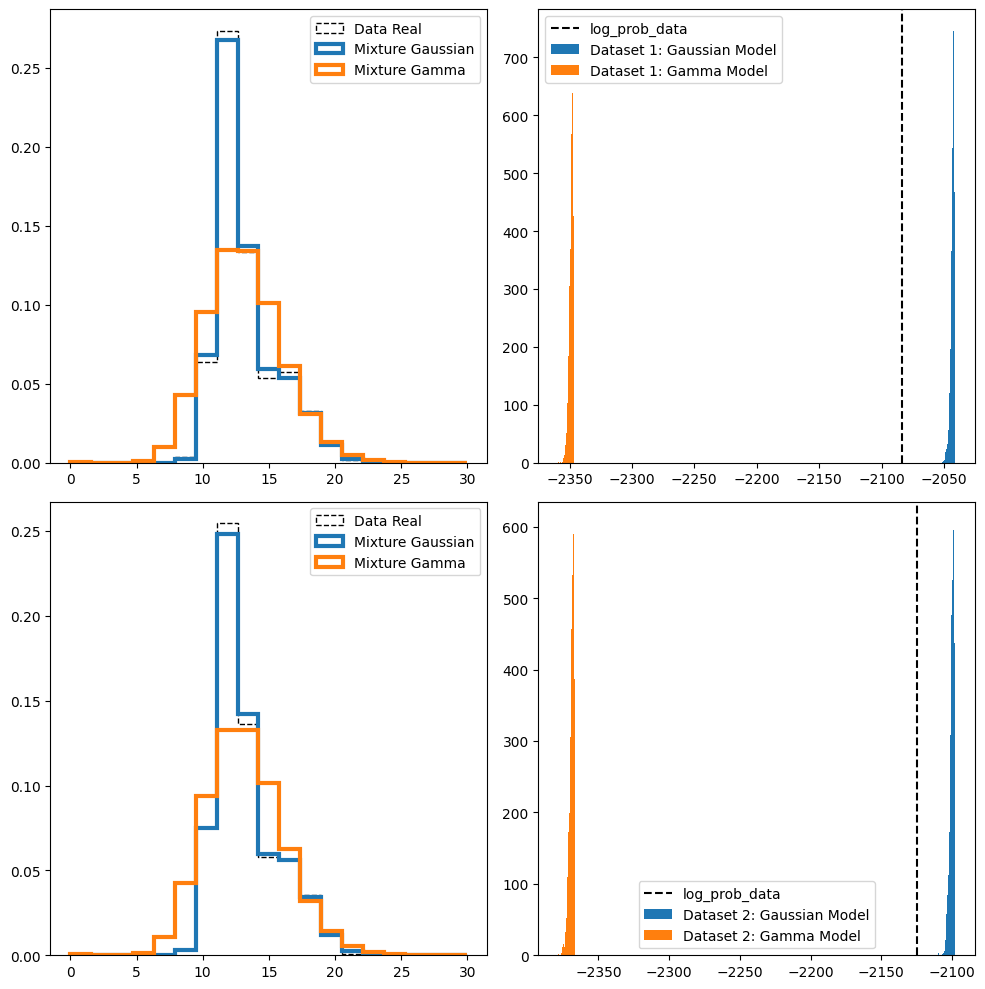

In [99]:

# Defino la función para crear datos
def create_data(mu0, sigma0, mu1, sigma1, p,seed):
    np.random.seed(seed)
    out = []
    bernoulli = np.random.binomial(1, p, size=1000)
    for i in range(len(bernoulli)):
        if bernoulli[i] == 1:
            out.append(np.random.normal(mu0,sigma0))
        else:
            out.append(np.random.normal(mu1,sigma1))
    return out

# Defino el modelo de Stan para la mezcla de gaussianas
my_mixture = """
data {
  int<lower=0> N;
  vector[N] y;
}

parameters {
  array[2] real<lower=0> sigma;
  ordered[2] mu;   //CHEQUEAR ESTA SINTAXIS!!!VER POR EJEMPLO, array[2] real mu (algo asi)
  real<lower=0, upper=1> theta;
}

model {   
 sigma ~ normal(0, 2);
 mu[1] ~ normal(5, 2);
 mu[2] ~ normal(7, 2);
 theta ~ beta(1, 1);
 for (n in 1:N)
   target += log_mix(theta,
                     normal_lpdf(y[n] | mu[1], sigma[1]),
                     normal_lpdf(y[n] | mu[2], sigma[2]));
}

generated quantities {
  vector[N] y_generated;
  for (n in 1:N) {
    real mu_selected;
    real sigma_selected;
    
    // Seleccionar aleatoriamente entre mu1 y mu2 según theta
    if (bernoulli_rng(theta) == 1) {
      mu_selected = mu[1];
      sigma_selected = sigma[1];
    } else {
      mu_selected = mu[2];
      sigma_selected = sigma[2];
    }
    
    // Generar una muestra de y_generated usando mu_selected y sigma_selected
    y_generated[n] = normal_rng(mu_selected, sigma_selected);
  }
}
"""

# Defino el modelo de Stan para la mezcla de gammas
my_mixture_gammas = """
data {
  int<lower=0> N;
  vector[N] y;
}


parameters {
  array[2] real<lower=0> alpha;
  array[2] real<lower=0> beta;
  real<lower=0, upper=1> theta;
}
model {
 alpha[1] ~ normal(10, 1);
 alpha[2] ~ normal(10, 1);
 beta[1] ~ normal(10, 1);
 beta[2] ~ normal(10, 1);
 theta ~ beta(1, 1);
 for (n in 1:N)
   target += log_mix(theta,
                     gamma_lpdf(y[n] | alpha[1], beta[1]),
                     gamma_lpdf(y[n] | alpha[2], beta[2]));
}

generated quantities {
  vector[N] y_generated;
  for (n in 1:N) {
    real alpha_selected;
    real beta_selected;
    
    // Seleccionar aleatoriamente entre alpha1 y alpha2 según theta
    if (bernoulli_rng(theta) == 1) {
      alpha_selected = alpha[1];
      beta_selected = beta[1];
    } else {
      alpha_selected = alpha[2];
      beta_selected = beta[2];
    }
    
    // Generar una muestra de y_generated usando alpha_selected y beta_selected
    y_generated[n] = gamma_rng(alpha_selected, beta_selected);
  }
}
"""

# Defino los parámetros para los datos
mu0 = 12
sigma0 = 1
mu1 = 16
sigma1 = 2
p = 0.7

tiradas = 2
# Crear una figura con subplots
fig, axs = plt.subplots(tiradas, 2, figsize=(10, 10))

#Para no tener que volver a correr el código de cero, guardo los datos.
datas = []
ys_gen_gammas = []
ys_gen_gaussian = []
logs_likelihood_gaussian = []
logs_likelihood_gamma = []
logs_prob_data = []
dfs_gaussian = []
df_gammas = []


# Repito el procedimiento para 10 conjuntos de datos
for i in range(tiradas):
    # Creo los datos
    data = create_data(mu0, sigma0, mu1, sigma1, p,seed=i)
    
    # Construyo y ajusto el modelo de la mezcla de gaussianas
    model_gaussian = stan.build(my_mixture, data={'N': len(data), 'y': data}, random_seed=i+1)
    fit_gaussian = model_gaussian.sample(num_chains=5, num_samples=1000)
    df_gaussian = fit_gaussian.to_frame()
    dfs_gaussian.append(df_gaussian)

    #Para ver p(X) del modelo gaussiano
    log_likelihood_gaussian = fit_gaussian['lp__'].tolist()[0]
    
    # Filtrar las columnas que comienzan con 'y_generated.'
    y_generated_columns_gaussian = [col for col in df_gaussian.columns if col.startswith('y_generated.')]
    
    # Apilar las columnas filtradas en una sola serie
    y_generated_concatenado_gaussian = df_gaussian[y_generated_columns_gaussian].stack().values
    
    # Construyo y ajusto el modelo de la mezcla de gammas
    model_gamma = stan.build(my_mixture_gammas, data={'N': len(data), 'y': data}, random_seed=i+1)
    fit_gamma = model_gamma.sample(num_chains=5, num_samples=1000)
    df_gamma = fit_gamma.to_frame()
    df_gammas.append(df_gamma)
    #Para ver p(X) del modelo gammas
    log_likelihood_gamma = fit_gamma['lp__'].tolist()[0]

    # Filtrar las columnas que comienzan con 'y_generated.'
    y_generated_columns_gamma = [col for col in df_gamma.columns if col.startswith('y_generated.')]
    
    # Apilar las columnas filtradas en una sola serie
    y_generated_concatenado_gamma = df_gamma[y_generated_columns_gamma].stack().values


    hist, bins = np.histogram(data, bins=np.linspace(0,30,20), density=True)
    # Calcula el logaritmo de la probabilidad de tus datos observados 'out'
    log_prob = 0  #ESTO ES LO QUE VOY A MOSTRAR EN EL GRÁFICO
    indices = []
    for point in data:
      idx = np.searchsorted(bins, point)
      indices.append(idx)
      if idx > 0 and idx < len(bins):
          log_prob += np.log(hist[idx - 1])
    logs_prob_data.append(log_prob)
    
    # Plots
    axs[i, 0].hist(data, bins=np.linspace(0,30,20), density=True, histtype='step', color='black', linestyle='dashed', lw=1, label='Data Real')
    axs[i, 0].hist(y_generated_concatenado_gaussian, bins=np.linspace(0,30,20), density=True, histtype='step', label='Mixture Gaussian', lw=3)
    axs[i, 0].hist(y_generated_concatenado_gamma, bins=np.linspace(0,30,20), density=True, histtype='step', label='Mixture Gamma', lw=3)
    axs[i, 0].legend()
    
    axs[i, 1].axvline(log_prob,ls = '--',color = 'black', label = 'log_prob_data')
    axs[i, 1].hist(log_likelihood_gaussian, bins=30, label=f'Dataset {i+1}: Gaussian Model')
    axs[i, 1].hist(log_likelihood_gamma, bins=30, label=f'Dataset {i+1}: Gamma Model')
    axs[i, 1].legend()

    datas.append(list(data))
    ys_gen_gammas.append(list(y_generated_concatenado_gamma))
    ys_gen_gaussian.append(list(y_generated_concatenado_gaussian))
    logs_likelihood_gaussian.append(list(log_likelihood_gaussian))
    logs_likelihood_gamma.append(list(log_likelihood_gamma))
    
# Ajustar la disposición de los subplots
plt.tight_layout()
# Mostrar la figura
plt.show()


In [106]:
hist, bins = np.histogram(data, bins=np.linspace(0,30,20), density=True)
# Calcula el logaritmo de la probabilidad de tus datos observados 'out'
log_prob = 0  #ESTO ES LO QUE VOY A MOSTRAR EN EL GRÁFICO
indices = []
for point in data:
  idx = np.searchsorted(bins, point)
  indices.append(idx)
  if idx > 0 and idx < len(bins):
      log_prob += np.log(hist[idx - 1])
logs_prob_data.append(log_prob)

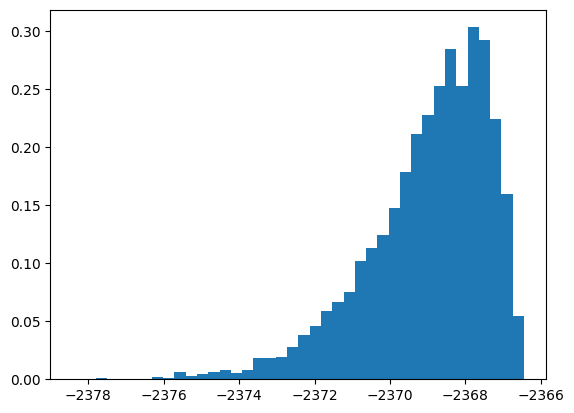

In [107]:
#plt.hist(dfs_gaussian[1]['lp__'],bins=400,density= True)
plt.hist(df_gammas[1]['lp__'],bins=40,density = True)
plt.show()

(array([  1.,   0.,   0.,   0.,   0.,   3.,   0.,   2.,   1.,   2.,   2.,
          2.,   2.,   5.,   9.,  16.,   8.,  12.,  24.,  27.,  28.,  36.,
         55.,  59.,  83., 117., 126., 149., 184., 247., 303., 335., 383.,
        456., 479., 577., 459., 417., 258., 133.]),
 array([-2053.50609833, -2053.18791886, -2052.8697394 , -2052.55155994,
        -2052.23338048, -2051.91520101, -2051.59702155, -2051.27884209,
        -2050.96066262, -2050.64248316, -2050.3243037 , -2050.00612423,
        -2049.68794477, -2049.36976531, -2049.05158585, -2048.73340638,
        -2048.41522692, -2048.09704746, -2047.77886799, -2047.46068853,
        -2047.14250907, -2046.82432961, -2046.50615014, -2046.18797068,
        -2045.86979122, -2045.55161175, -2045.23343229, -2044.91525283,
        -2044.59707337, -2044.2788939 , -2043.96071444, -2043.64253498,
        -2043.32435551, -2043.00617605, -2042.68799659, -2042.36981712,
        -2042.05163766, -2041.7334582 , -2041.41527874, -2041.09709927,
      

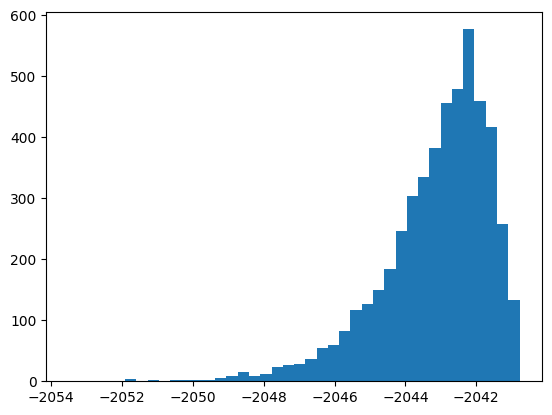

In [109]:
plt.hist(logs_likelihood_gaussian[0],bins=40)

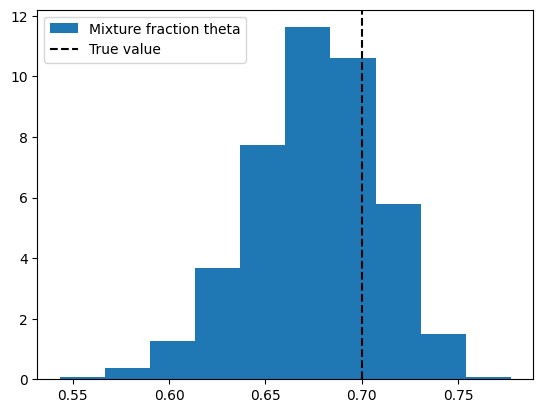

In [110]:
plt.hist(dfs_gaussian[0]['theta'],density = True,label = 'Mixture fraction theta')
plt.axvline(p,ls='--',color = 'black',label='True value')
plt.legend()

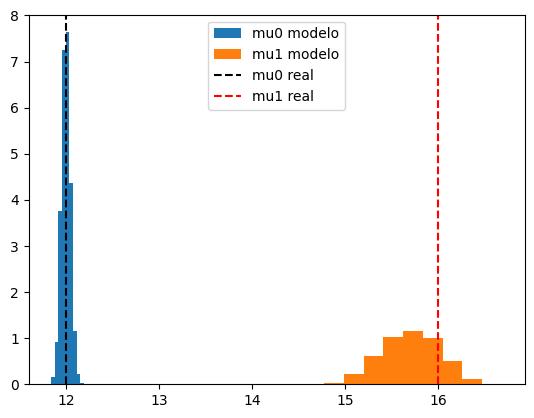

In [111]:
plt.hist(dfs_gaussian[0]['mu.1'],density= True,label='mu0 modelo')
plt.hist(dfs_gaussian[0]['mu.2'],density= True,label='mu1 modelo')
plt.axvline(mu0,label='mu0 real',color='black',ls='--')
plt.axvline(mu1,label='mu1 real',color='red',ls='--')
plt.legend()

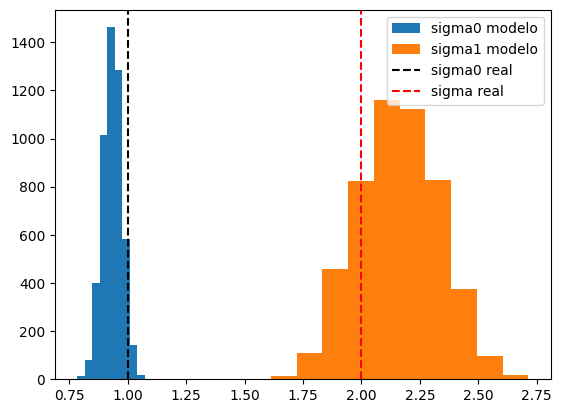

In [112]:
plt.hist(dfs_gaussian[0]['sigma.1'],label='sigma0 modelo')
plt.hist(dfs_gaussian[0]['sigma.2'],label='sigma1 modelo')
plt.axvline(sigma0,label='sigma0 real',color='black',ls='--')
plt.axvline(sigma1,label='sigma real',color='red',ls='--')
plt.legend()

### Posterior predictive check

In [113]:
# Supongamos que separas un 20% de los datos para el conjunto hold-out
np.random.seed(42)  # Para reproducibilidad
data_full = create_data(mu0, sigma0, mu1, sigma1, p, seed=42)
data_shuffled = np.random.permutation(data_full)
cutoff = int(0.8 * len(data_shuffled))  # 80% para observación, 20% para hold-out
data_obs = data_shuffled[:cutoff]
data_held = data_shuffled[cutoff:]


In [114]:
len(data_obs), len(data_held)

(800, 200)

In [115]:
# Ajusto el modelo solo utilizando data_obs.
model_gaussian = stan.build(my_mixture, data={'N': len(data_obs), 'y': data_obs}, random_seed=42)
fit_gaussian = model_gaussian.sample(num_chains=5, num_samples=1000)


Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_5_lja2jv/model_7b3fedkg.stan', line 17, column 1: The
    parameter theta is on the left-hand side of more than one tilde
    statement.
Sampling:   0%
Sampling:   0% (1/10000)
Sampling:   0% (2/10000)
Sampling:   0% (3/10000)
Sampling:   2% (203/10000)
Sampling:   2% (204/10000)
Sampling:   7% (704/10000)
Sampling:   8% (803/10000)
Sampling:  10% (1002/10000)
Sampling:  23% (2302/10000)
Sampling:  24% (2401/10000)
Sampling:  25% (2500/10000)
Sampling:  26% (2600/10000)
Sampling:  27% (2700/10000)
Sampling:  28% (2800/10000)
Sampling:  29% (2900/10000)
Sampling:  30% (3000/10000)
Sampling:  31% (3100/10000)
Sampling:  32% (3200/10000)
Sampling:  33% (3300/10000)
Sampling:  34% (3400/10000)
Sampling:  36% (3600/10000)
Sampling:  37% (3700/10000)
Sampling:  41% (4100/10000)
Sampling:  42% (4200/10000)
Sampling:  44% (4400/10000)
Sampling:  47% (4700/10000)
Sampling:  58% (5800/10000)
Sampling:  59% (5900/10000

  Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/tmp/httpstan_3_pg60im/model_7b3fedkg.stan', line 19, column 3 to line 21, column 58)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/tmp/httpstan_3_pg60im/model_7b3fedkg.stan', line 19, column 3 to line 21, column 58)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


In [116]:
# Extraer datos generados del fit
df_gaussian = fit_gaussian.to_frame()
y_generated_columns = [col for col in df_gaussian.columns if col.startswith('y_generated.')]
y_replicated = df_gaussian[y_generated_columns].stack().values


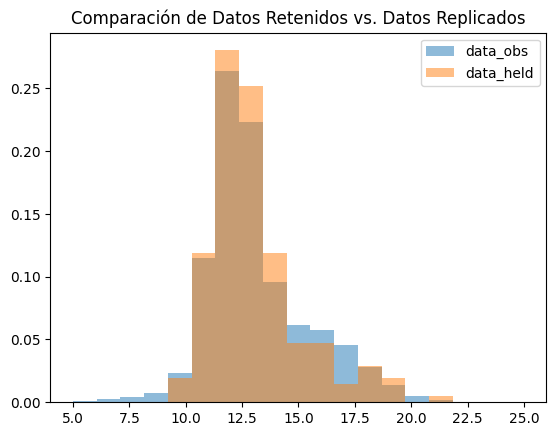

In [128]:
plt.hist(y_replicated,bins=np.linspace(5,25,20),label='data_obs',alpha=0.5,density=True)
plt.hist(data_held, bins=np.linspace(5,25,20),label='data_held',alpha=0.5,density=True)
plt.title('Comparación de Datos Retenidos vs. Datos Replicados')
plt.legend()

In [118]:
len(y_replicated)

4000000

In [119]:
# Definir el rango y el número de bins
xbins = 20
Emin = min(y_replicated)
Emax = max(y_replicated)
stepx = (Emax - Emin) / xbins

# Crear el histograma
histogram = np.zeros(xbins, dtype=np.int32)
for value in y_replicated:
    binx = int((value - Emin) / stepx)
    if binx == xbins:  # Para manejar el caso cuando value es exactamente Emax
        binx -= 1
    histogram[binx] += 1



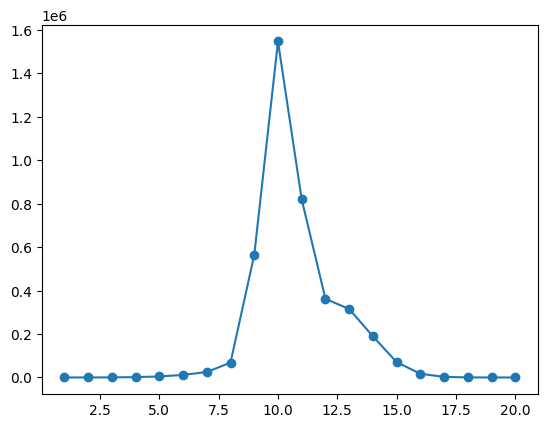

In [120]:
plt.plot(np.arange(1,len(histogram)+1),histogram,'o-')

In [121]:
def predictive_score(held_i):
    mybinx = int((held_i - Emin) / stepx)
    if mybinx == xbins:  # Para manejar el caso cuando mbb es exactamente Emax
        mybinx -= 1
    mypdf = histogram[mybinx] #frecuencia del bin correspondiente al valor held_i
    
    mayor = 0
    menor = 0
    for i in range(xbins):
        tmp = histogram[i]
        if tmp > mypdf:
            mayor += tmp
        else:
            menor += tmp
    
    return menor / (menor + mayor)
'''
La función recorre todos los bins del histograma y compara las frecuencias de cada bin con la frecuencia del bin que contiene a held_i:
 - mayor: Suma de las frecuencias de todos los bins que tienen una frecuencia mayor que el bin de held_i.
 - menor: Suma de las frecuencias de todos los bins que tienen una frecuencia menor o igual al bin de held_i.

La función retorna un valor que es la proporción de la suma de frecuencias que son menores o iguales a la del bin de held_i
entre la suma total de todas las frecuencias (menores y mayores). Este valor es una medida de cuán típico o atípico es el 
valor held_i con respecto a la distribución de los datos replicados.
'''

'\nLa función recorre todos los bins del histograma y compara las frecuencias de cada bin con la frecuencia del bin que contiene a held_i:\n - mayor: Suma de las frecuencias de todos los bins que tienen una frecuencia mayor que el bin de held_i.\n - menor: Suma de las frecuencias de todos los bins que tienen una frecuencia menor o igual al bin de held_i.\n\nLa función retorna un valor que es la proporción de la suma de frecuencias que son menores o iguales a la del bin de held_i\nentre la suma total de todas las frecuencias (menores y mayores). Este valor es una medida de cuán típico o atípico es el \nvalor held_i con respecto a la distribución de los datos replicados.\n'

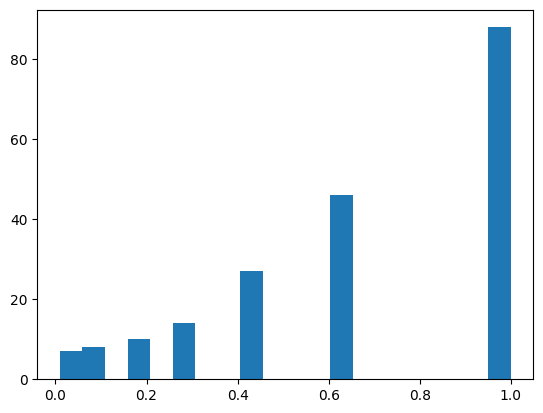

Promedio de Predictive Score: 0.6690986875


In [122]:
score_held = []
for value in data_held:
    score_held.append(predictive_score(value))
plt.hist(score_held, bins=20)
plt.show()
print("Promedio de Predictive Score:", np.mean(score_held))
#SI FUNCIONA BIEN, DEBERÍA DAR CERCANO A 0.5

In [123]:
plt.scatter(np.linspace(1,len(data_held),len(data_held)),score)

NameError: name 'score' is not defined

In [ ]:
pd.DataFrame(score).value_counts()